In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits

In [3]:
X, y = load_digits(return_X_y = True)
# Creating a dataset with imbalanced binary classes:  
# Negative class (0) is 'not digit 2' 
# Positive class (1) is 'digit 2'
y_binary_imbalanced = y.copy()
y_binary_imbalanced[y_binary_imbalanced != 2] = 0
y_binary_imbalanced[y_binary_imbalanced == 2] = 1

print('Original labels:\t', y[0:30])
print('New binary labels:\t', y_binary_imbalanced[0:30])

Original labels:	 [0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
New binary labels:	 [0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state = 0)

In [17]:
#Train an SVM to classify the data
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)
print('Accuracy of SVM:', svc.score(X_test, y_test))

Accuracy of SVM: 0.9977777777777778


In [13]:
#Train a dummy classifier
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
print('Accuracy of dummy classifier:', dummy_majority.score(X_test, y_test))

Accuracy of dummy classifier: 0.9022222222222223


In [15]:
dummy_strat = DummyClassifier(strategy = 'stratified').fit(X_train, y_train)
print('Accuracy of dummy classifier 2:', dummy_strat.score(X_test, y_test))

Accuracy of dummy classifier 2: 0.8177777777777778


In [18]:
#Confusion matrices
from sklearn.metrics import confusion_matrix
svc_predict = svc.predict(X_test)
dummy1_predict = dummy_majority.predict(X_test)
dummy2_predict = dummy_strat.predict(X_test)

print('Confusion matrices')
print('SVC:\n', confusion_matrix(y_test, svc_predict))
print('Dummy 1:\n', confusion_matrix(y_test, dummy1_predict))
print('Dummy 2:\n', confusion_matrix(y_test, dummy2_predict))

Confusion matrices
SVC:
 [[405   1]
 [  0  44]]
Dummy 1:
 [[406   0]
 [ 44   0]]
Dummy 2:
 [[358  48]
 [ 40   4]]


In [20]:
from sklearn.metrics import classification_report
print('Classification reports')
print('SVC:\n', classification_report(y_test, svc_predict, target_names = ['not 2', '2']))
#print('Dummy 1:\n', classification_report(y_test, dummy1_predict, target_names = ['not 2', '2']))
print('Dummy 2:\n', classification_report(y_test, dummy2_predict, target_names = ['not 2', '2']))

Classification reports
SVC:
               precision    recall  f1-score   support

       not 2       1.00      1.00      1.00       406
           2       0.98      1.00      0.99        44

    accuracy                           1.00       450
   macro avg       0.99      1.00      0.99       450
weighted avg       1.00      1.00      1.00       450

Dummy 2:
               precision    recall  f1-score   support

       not 2       0.90      0.88      0.89       406
           2       0.08      0.09      0.08        44

    accuracy                           0.80       450
   macro avg       0.49      0.49      0.49       450
weighted avg       0.82      0.80      0.81       450



# Decision functions

In [39]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C = 0.001, max_iter = 10000).fit(X_train, y_train)
lr.score(X_test, y_test)

0.9844444444444445

In [40]:
lr_scores = lr.decision_function(X_test)
y_score_list = list(zip(y_test[0:20], lr_scores[0:20]))
y_score_list

[(1, 2.9093380619629916),
 (0, -2.6622087438655466),
 (1, 4.528564950407688),
 (0, -4.723250172272628),
 (0, -4.39120035511719),
 (0, -3.8539966163371955),
 (0, -2.5060516601494243),
 (0, -4.865073679733062),
 (0, -4.472041606660669),
 (0, -2.157416963537659),
 (1, 3.733670413366179),
 (0, -3.2942742339150484),
 (0, -6.042336285431816),
 (0, -4.750130100741871),
 (0, -4.440942991609699),
 (0, -4.458420361458783),
 (0, -6.605876142615401),
 (0, -4.850189466386133),
 (0, -8.025643598019121),
 (0, -2.7405781152225694)]

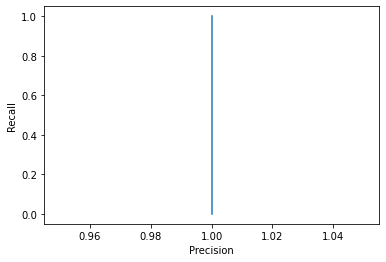

array([ 0.49668553,  0.98926315,  1.95926974,  3.07650758,  3.44391461,
        3.5169444 ,  3.97717041,  3.98929324,  4.0251095 ,  4.08788736,
        4.14035459,  4.49124515,  4.75216606,  5.0233579 ,  5.14236627,
        6.05393001,  6.08862967,  6.46225886,  6.74538494,  6.89747391,
        7.7338763 ,  7.86635214,  8.36833116,  8.52966205,  9.20423882,
        9.69401345,  9.98820449, 10.37215239, 10.76423496, 11.76943562,
       13.20092827, 13.67832784, 13.93560534, 14.19987132, 14.91824526,
       14.96875579, 15.24296113, 15.24412599, 16.09892835, 16.25903776,
       17.19190179, 17.30326235, 19.27749445, 19.56870533])

In [32]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, lr_scores)

plt.figure()
plt.plot(precision, recall)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.show()
thresholds

In [33]:
precision

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [34]:
recall

array([1.        , 0.97727273, 0.95454545, 0.93181818, 0.90909091,
       0.88636364, 0.86363636, 0.84090909, 0.81818182, 0.79545455,
       0.77272727, 0.75      , 0.72727273, 0.70454545, 0.68181818,
       0.65909091, 0.63636364, 0.61363636, 0.59090909, 0.56818182,
       0.54545455, 0.52272727, 0.5       , 0.47727273, 0.45454545,
       0.43181818, 0.40909091, 0.38636364, 0.36363636, 0.34090909,
       0.31818182, 0.29545455, 0.27272727, 0.25      , 0.22727273,
       0.20454545, 0.18181818, 0.15909091, 0.13636364, 0.11363636,
       0.09090909, 0.06818182, 0.04545455, 0.02272727, 0.        ])

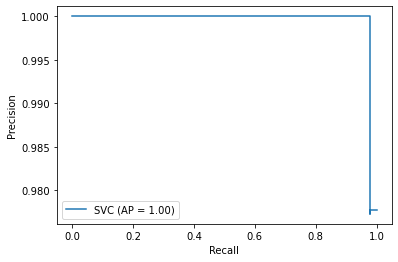

In [37]:
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(svc, X_test, y_test)

## ROC and AUC

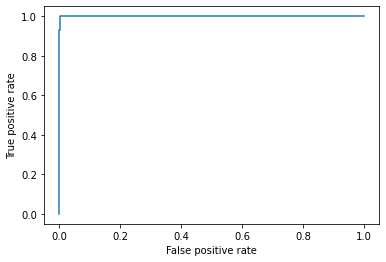

Area under the curve = 0.9998320644872368


In [41]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, lr_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()
print('Area under the curve =', roc_auc)